<a href="https://colab.research.google.com/github/noviaardiyanti10/Klasifikasi-KNN-C45/blob/main/TugasKlasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritma Decision Tree merupakan algoritma klasifikasi yang menggunakan struktur pohon dan menghasilkan aturan-aturan keputusan atau rule. Terdapat beberapa algoritma turunan dari decision tree diantaranya ID3, C4.5 dan CART. Untuk membuat node pohon pada decision tree, terlebih dahulu dilakukan perhitungan entropy dan nilai entropy tertinggi akan menjadi node pohon. Berikut merupakan rumus dari nilai entropy.

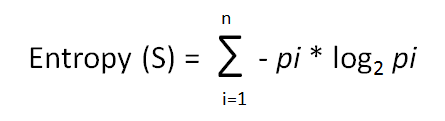

K-Nearest Neighbor merupakan metode yang mengklasifikasikan data berdasarkan jarak terdekat dengan tetangga dan kemiripan dengan label data. Pada metode KNN, data latih dijelaskan dengan fitur numerik pada n-dimensi dan disimpan dalam ruangan n-dimensi. Selanjutnya, untuk menguji hasil klasifikasi digunakan data uji di mana metode KNN mencari nilai k pada latih yang memiliki jarak terdekat dengan data uji. Perhitungan jarak terdekat dapat dilakukan dengan menggunakan rumus Euclidean Distance, sebagai berikut.
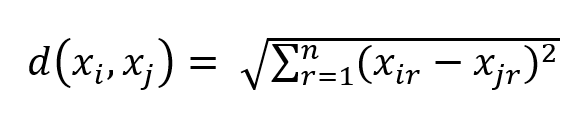

In [ ]:
#import dataset wine.csv dari drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import library pandas
import pandas as pd
url = "/content/drive/MyDrive/Digitalent/wine.csv" #menyimpan path dari file ke variabel url

#membuat list nama atribut/kolom dan menyimpan ke dalam list_cols
list_cols = ['name' ,'alcohol','malicAcid','ash','ashalcalinity', 'magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']

#membaca dataset dengan memanggil variabel url dan list_cols
wine = pd.read_csv(url, names=list_cols)

#memanngil dan mencetak 5 data pertama pada dataset
wine.head()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#mendeskripsikan dataset
wine.describe()

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


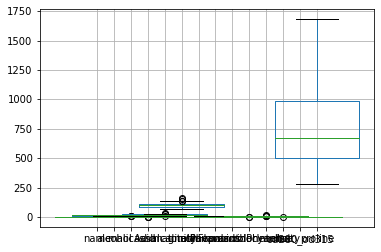

In [ ]:
#import library matplotlib untuk melakukan plotting 
import matplotlib.pyplot as plt

#melakukan plotting data outlier dengan boxplot dengan lebar kotak sebesar 5
wine.boxplot(widths=5)

In [ ]:
#menghapus kolom name dan simpan kolom yang tidak terhapus ke variabel x
x = wine.drop('name', axis=1)

#menyimpan data data pada kolom name dataset pada variabel y
y = wine.name

In [1]:
#model_knn.fit(x,y)

In [ ]:
#memanggil dan mengimport sklearn modul train_test_split untuk membagi dataset
from sklearn.model_selection import train_test_split

#mendeklarasikan variabel dan menyimpan data ke dalam variabel dengan ukuran data testing 25% dan random data dilakukan sebanyak 5 kali
x_train, x_tes, y_train, y_tes = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [ ]:
#import metode KNN pada library sklearn 
from sklearn.neighbors import KNeighborsClassifier

#menyimpan data metode KNN dengan jumlah nilai n=1 dan perhitungan jarak menggunakan distande ke variabel model_knn
model_knn = KNeighborsClassifier(n_neighbors=11, weights='distance')

#menerima input untuk data sampel (x) dan label (target y ).
model_knn.fit(x_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [ ]:
#menyimpan hasil prediksi kelas pada data testing ke variabel y_predict
y_predict = model_knn.predict(x_tes)

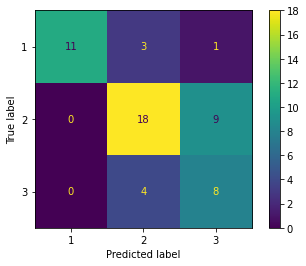

In [ ]:
#import library sklearn dan method confusion matrix untuk menghitung akurasi, precisoion, recall dan F1Score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#menampilkan plotting dari confusion matrix model KNN
ConfusionMatrixDisplay(cm,display_labels=model_knn.classes_).plot()

In [ ]:
#mengimport modul sklearn metric dan menghitung nilai akurasi, precisoion, recall dan F1Score dengan rata-rata macro
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_tes,y_predict,average='macro')

(0.7260233918128655, 0.7321317973491887, 0.7142857142857144, None)

In [ ]:
#mencetak hasil nilai akurasi, precisoion, recall dan F1Score pada data testing
print(classification_report(y_tes, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.90      0.67      0.77        27
           3       0.50      0.83      0.62        12

    accuracy                           0.78        54
   macro avg       0.80      0.81      0.79        54
weighted avg       0.84      0.78      0.79        54



In [ ]:
#mengimport modul tree pada library sklearn
from sklearn import tree

#memanggil metode decision tree dengan kriteria entropy dan maksimum kedalaman=4 pada variabel model_dcs
model_dcs = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)

#menerima input untuk data sampel (x) dan label (target y ).
model_dcs = model_dcs.fit(x_train, y_train)

#menyimpan hasil prediksi kelas pada data testing ke variabel y_predict_dcs
y_predict_dcs = model_dcs.predict(x_tes)

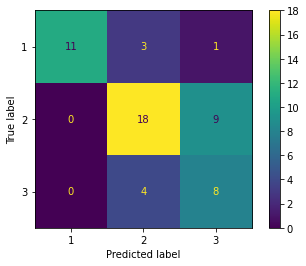

In [ ]:
#menampilkan plotting dari confusion matrix model KNN
ConfusionMatrixDisplay(cm,display_labels=model_dcs.classes_).plot()

In [ ]:
#mengimport modul sklearn metric dan menghitung nilai akurasi, precisoion, recall dan F1Score dengan rata-rata macro
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_tes,y_predict,average='macro')

(0.7260233918128655, 0.7321317973491887, 0.7142857142857144, None)

In [ ]:
#mencetak nilai hasil klasifikasi dengan method classfication_report
print(classification_report(y_tes, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.90      0.67      0.77        27
           3       0.50      0.83      0.62        12

    accuracy                           0.78        54
   macro avg       0.80      0.81      0.79        54
weighted avg       0.84      0.78      0.79        54



[Text(141.64615384615385, 195.696, 'X[6] <= 1.575\nentropy = 1.579\nsamples = 124\nvalue = [44, 44, 36]'),
 Text(51.50769230769231, 152.208, 'X[9] <= 3.9\nentropy = 0.684\nsamples = 44\nvalue = [0, 8, 36]'),
 Text(25.753846153846155, 108.72, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(77.26153846153846, 108.72, 'X[10] <= 0.945\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(51.50769230769231, 65.232, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 36]'),
 Text(103.01538461538462, 65.232, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(231.7846153846154, 152.208, 'X[12] <= 724.5\nentropy = 0.993\nsamples = 80\nvalue = [44, 36, 0]'),
 Text(180.27692307692308, 108.72, 'X[0] <= 13.175\nentropy = 0.196\nsamples = 33\nvalue = [1, 32, 0]'),
 Text(154.52307692307693, 65.232, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(206.03076923076924, 65.232, 'X[12] <= 545.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(180.27692307692308, 21.744, 'entrop

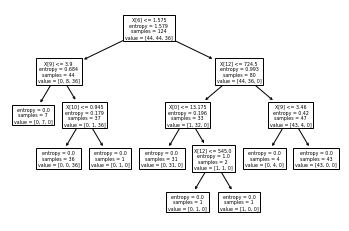

In [ ]:
from sklearn import tree

#memanggil method plot_tree untuk menampilkan pohon keputusan pada model klasifikasi 
tree.plot_tree(model_dcs)